In [3]:
!pip install statsmodels

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB 2.0 MB/s eta 0:00:05
    --------------------------------------- 0.2/10.0 MB 3.8 MB/s eta 0:00:03
   - -------------------------------------- 0.4/10.0 MB 3.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/10.0 MB 3.9 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/10.0 MB 4.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/10.0 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.0 MB 4.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/10.0 MB 3.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.0 MB 3.9 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/10.0 MB 3.8 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/10.0 MB 3.9 MB/s eta 0:00:03
   -------- -----

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [3]:
car_df = pd.read_csv("D:/dmba/ToyotaCorolla.csv")
car_df = car_df.iloc[0:1000]

predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
outcome = 'Price'


In [4]:

X = pd.get_dummies(car_df[predictors], drop_first=True)
X

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,1,0,2000,3,210,1165,True,False
1,23,72937,90,1,0,2000,3,210,1165,True,False
2,24,41711,90,1,0,2000,3,210,1165,True,False
3,26,48000,90,0,0,2000,3,210,1165,True,False
4,30,38500,90,0,0,2000,3,210,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
995,68,42750,110,1,0,1600,3,69,1050,False,True
996,67,42102,110,1,0,1600,5,85,1075,False,True
997,63,41586,110,1,0,1600,5,19,1114,False,True
998,64,41200,110,0,0,1600,5,85,1070,False,True


In [5]:
y = car_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)
print(pd.DataFrame({'Predictor':X.columns, 'coefficient':car_lm.coef_}))

           Predictor  coefficient
0          Age_08_04  -140.748761
1                 KM    -0.017840
2                 HP    36.103419
3          Met_Color    84.281830
4          Automatic   416.781954
5                 CC     0.017737
6              Doors   -50.657863
7      Quarterly_Tax    13.625325
8             Weight    13.038711
9   Fuel_Type_Diesel  1066.464681
10  Fuel_Type_Petrol  2310.249543


In [6]:
regressionSummary(train_y, car_lm.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994


In [7]:
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted':car_lm_pred, 'Actual':valid_y, 'Residual':valid_y - car_lm_pred})

print(result.head(20))

        Predicted  Actual     Residual
507  10607.333940   11500   892.666060
818   9272.705792    8950  -322.705792
452  10617.947808   11450   832.052192
368  13600.396275   11450 -2150.396275
242  12396.694660   11950  -446.694660
929   9496.498212    9995   498.501788
262  12480.063217   13500  1019.936783
810   8834.146068    7950  -884.146068
318  12183.361282    9900 -2283.361282
49   19206.965683   21950  2743.034317
446  10987.498309   11950   962.501691
142  18501.527375   19950  1448.472625
968   9914.690947    9950    35.309053
345  13827.299932   14950  1122.700068
971   7966.732543   10495  2528.267457
133  17185.242041   15950 -1235.242041
104  19952.658062   19450  -502.658062
6    16570.609280   16900   329.390720
600  13739.409113   11250 -2489.409113
496  11267.513740   11750   482.486260


In [8]:
regressionSummary(valid_y, car_lm_pred)


Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
          Mean Percentage Error (MPE) : -0.2633
Mean Absolute Percentage Error (MAPE) : 9.0111


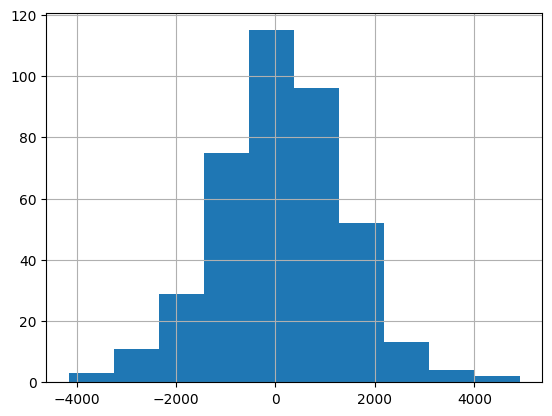

In [9]:
ax = result.Residual.hist()


In [10]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)

    d = {'n':result['n'], 'r2adj': -result['score'], 'AIC':AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)

pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))

,n,r2adj,AIC,Age_08_04,Automatic,CC,Doors,Fuel_Type_Diesel,Fuel_Type_Petrol,HP,KM,Met_Color,Quarterly_Tax,Weight
0,1,0.767901,10689.712094,True,False,False,False,False,False,False,False,False,False,False
1,2,0.801160,10597.910645,True,False,False,False,False,False,True,False,False,False,False
2,3,0.829659,10506.084235,True,False,False,False,False,False,True,False,False,False,True
3,4,0.846357,10445.174820,True,False,False,False,False,False,True,True,False,False,True
4,5,0.849044,10435.578836,True,False,False,False,False,False,True,True,False,True,True
5,6,0.853172,10419.932278,True,False,False,False,False,True,True,True,False,True,True
6,7,0.853860,10418.104025,True,False,False,False,True,True,True,True,False,True,True
7,8,0.854297,10417.290103,True,True,False,False,True,True,True,True,False,True,True
8,9,0.854172,10418.789079,True,True,False,True,True,True,True,True,False,True,True
9,10,0.854036,10420.330800,True,True,False,True,True,True,True,True,True,True,True


In [11]:
def train_model(variables):
    model=LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=10422.30
Step: score=10420.33, remove CC
Step: score=10418.79, remove Met_Color
Step: score=10417.29, remove Doors
Step: score=10417.29, remove None
['Age_08_04', 'KM', 'HP', 'Automatic', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


In [12]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984


In [13]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)

    return model

def score_model(model, variables):
    if len(variables)==0:
        return AIC_score(train_y, [train_y.mean()]*len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, add None


In [14]:
print(best_variables)

['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']
